In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtypes = {'order': 'category', 'size': 'category', 'sorting_type': 'category', 'comparison_count': 'int64', 'swap_count': 'int64'}

In [3]:
df = pd.read_csv('comparing_sorts.csv', dtype=dtypes)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order             75 non-null     category
 1   size              75 non-null     category
 2   sorting_type      75 non-null     category
 3   comparison_count  75 non-null     int64   
 4   swap_count        75 non-null     int64   
dtypes: category(3), int64(2)
memory usage: 2.0 KB


In [5]:
print(df.to_markdown())



|    | order      |   size | sorting_type    |   comparison_count |   swap_count |
|---:|:-----------|-------:|:----------------|-------------------:|-------------:|
|  0 | ascending  |     50 | quicksort_type1 |               1225 |           49 |
|  1 | ascending  |     50 | quicksort_type2 |                 49 |            0 |
|  2 | ascending  |     50 | quicksort_type3 |                 49 |            0 |
|  3 | ascending  |     50 | quicksort_type4 |                237 |          202 |
|  4 | ascending  |     50 | merge_sort      |                161 |          300 |
|  5 | ascending  |   1000 | quicksort_type1 |             499500 |          999 |
|  6 | ascending  |   1000 | quicksort_type2 |             494550 |          899 |
|  7 | ascending  |   1000 | quicksort_type3 |             498275 |          949 |
|  8 | ascending  |   1000 | quicksort_type4 |               8977 |         6043 |
|  9 | ascending  |   1000 | merge_sort      |               5052 |        10000 |
| 10

In [6]:
# count the number of unique values in each column
df.nunique()


order                3
size                 5
sorting_type         5
comparison_count    71
swap_count          62
dtype: int64

In [7]:
df_ascending = df[df['order'] == 'ascending']

In [8]:
df_descending = df[df['order'] == 'descending']

In [9]:
df_random = df[df['order'] == 'random']

In [10]:
ascending_all = df_ascending.groupby(['sorting_type','size'], sort=False).agg({'comparison_count': 'sum', 'swap_count': 'sum'})

In [11]:
descending_all = df_descending.groupby(['sorting_type','size'], sort=False).agg({'comparison_count': 'sum', 'swap_count': 'sum'})

In [12]:
random_all = df_random.groupby(['sorting_type','size'], sort=False).agg({'comparison_count': 'sum', 'swap_count': 'sum'})

In [13]:
ascending_all

comparison_count  swap_count
sorting_type    size                               
quicksort_type1 50                 1225          49
                1000             499500         999
                2000            1999000        1999
                5000           12497500        4999
                10000          49995000        9999
quicksort_type2 50                   49           0
                1000             494550         899
                2000            1994050        1899
                5000           12492550        4899
                10000          49990050        9899
quicksort_type3 50                   49           0
                1000             498275         949
                2000            1997775        1949
                5000           12496275        4949
                10000          49993775        9949
quicksort_type4 50                  237         202
                1000               8977        6043
                2000              19953       13087
                5000              56809       37003
                10000            123617       79007
merge_sort      50                  161         300
                1000               5052       10000
                2000              11104       22000
                5000              33356       65000
                10000             71712      140000

In [14]:
descending_all

comparison_count  swap_count
sorting_type    size                               
quicksort_type1 50                 1274         675
                1000             500499      251000
                2000            2000999     1002000
                5000           12502499     6255000
                10000          50004999    25010000
quicksort_type2 50                 1225        1225
                1000             500400      253350
                2000            2000900     1004350
                5000           12502400     6257350
                10000          50004900    25012350
quicksort_type3 50                 1225        1225
                1000             500450      251550
                2000            2000950     1002550
                5000           12502450     6255550
                10000          50004950    25010550
quicksort_type4 50                  267         250
                1000              11443        9162
                2000              25816       20271
                5000              73868       56525
                10000            162664      123021
merge_sort      50                  133         300
                1000               4932       10000
                2000              10864       22000
                5000              29804       65000
                10000             64608      140000

In [15]:
random_all

comparison_count  swap_count
sorting_type    size                               
quicksort_type1 50                  282         172
                1000              11944        6326
                2000              29838       14117
                5000              76304       36665
                10000            172198       88722
quicksort_type2 50                  627         580
                1000              21212       17226
                2000              49707       37528
                5000             136734      106113
                10000            276490      211347
quicksort_type3 50                  627         580
                1000              14990       10488
                2000              36901       23683
                5000              94737       60730
                10000            209253      138512
quicksort_type4 50                  272         239
                1000              11966        8432
                2000              25314       19240
                5000              81984       64917
                10000            153177      108854
merge_sort      50                  228         300
                1000               8727       10000
                2000              19454       22000
                5000              56828       65000
                10000            123644      140000

In [16]:
sns.set_theme(style='ticks')

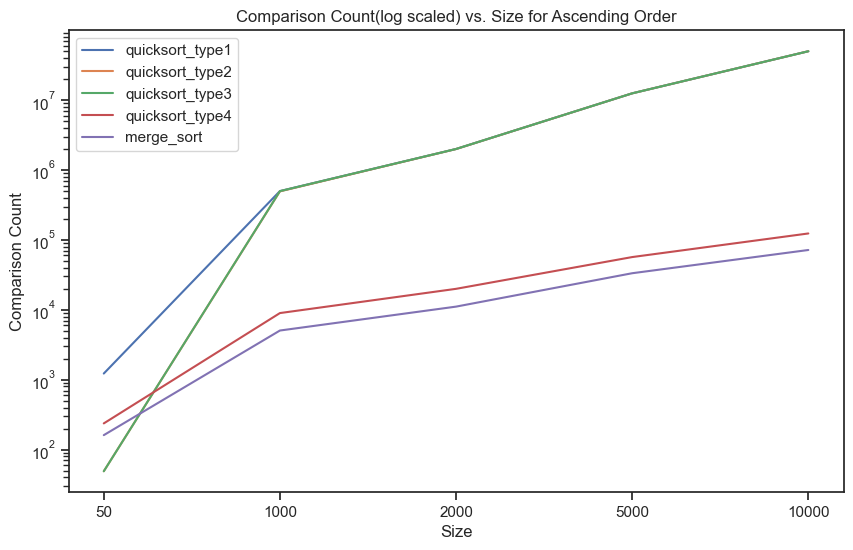

In [20]:
# plot the dataframes
fig, ax = plt.subplots(figsize=(10,6))

# plot the dataframes
sns.lineplot(x='size', y='comparison_count', hue='sorting_type', data=ascending_all, ax=ax)

# add a legend
ax.legend(loc='upper left')

# add a title
ax.set_title('Comparison Count(log scaled) vs. Size for Ascending Order')

# add x and y labels
ax.set_xlabel('Size')
ax.set_ylabel('Comparison Count')

# scale the y axis to a logarithmic scale
ax.set_yscale('log')

plt.show()

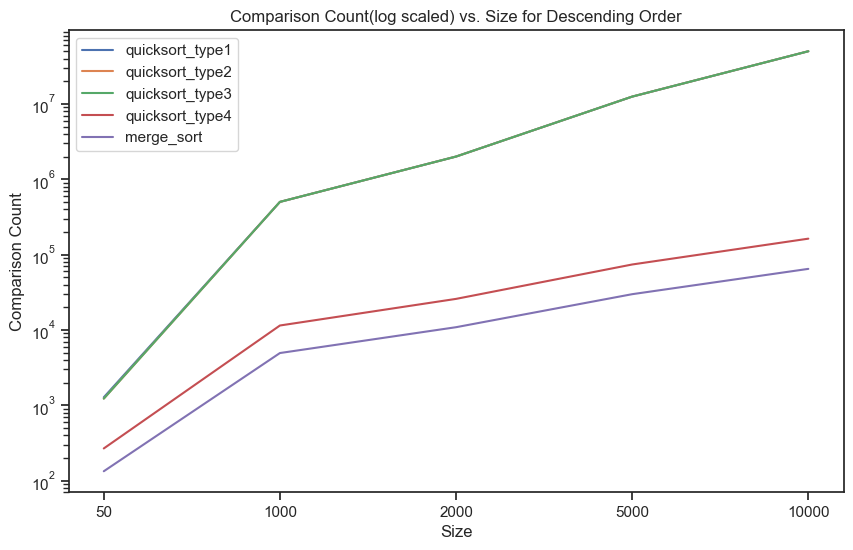

In [27]:
# plot the dataframes
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x='size', y='comparison_count', hue='sorting_type', data=descending_all, ax=ax)

# add a legend
ax.legend(loc='upper left')

# add a title
ax.set_title('Comparison Count(log scaled) vs. Size for Descending Order')

# add x and y labels
ax.set_xlabel('Size')
ax.set_ylabel('Comparison Count')

# scale the y axis to a logarithmic scale
ax.set_yscale('log')

plt.show()

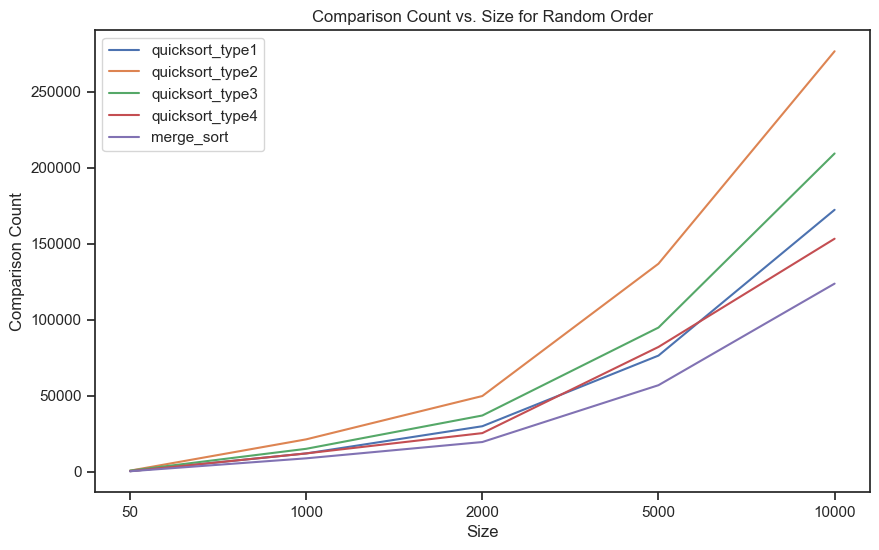

In [20]:
# plot the dataframes
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x='size', y='comparison_count', hue='sorting_type', data=random_all, ax=ax)

# add a legend
ax.legend(loc='upper left')

# add a title
ax.set_title('Comparison Count vs. Size for Random Order')

# add x and y labels
ax.set_xlabel('Size')
ax.set_ylabel('Comparison Count')

plt.show()

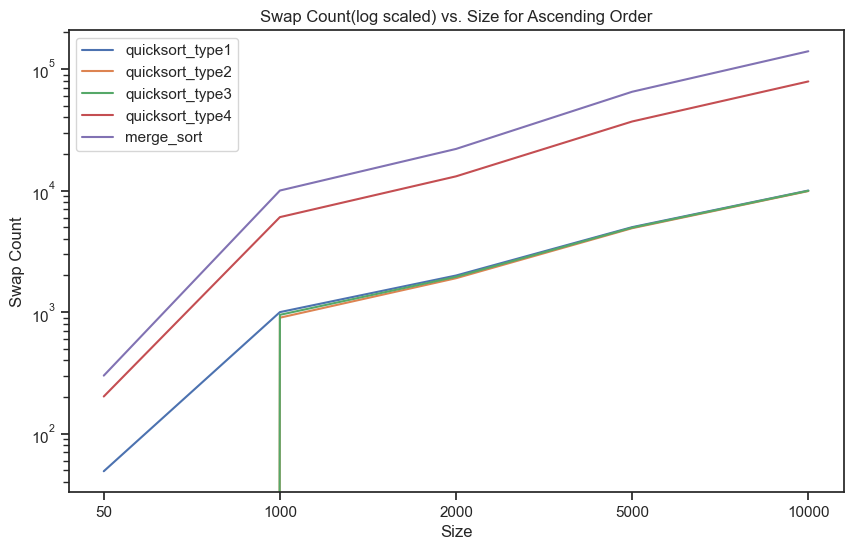

In [26]:
# plot Swap Count vs. Size for Ascending Order
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x='size', y='swap_count', hue='sorting_type', data=ascending_all, ax=ax)

# add a legend
ax.legend(loc='upper left')

# add a title
ax.set_title('Swap Count(log scaled) vs. Size for Ascending Order')

# add x and y labels
ax.set_xlabel('Size')
ax.set_ylabel('Swap Count')

# scale the y axis to a logarithmic scale
ax.set_yscale('log')

plt.show()

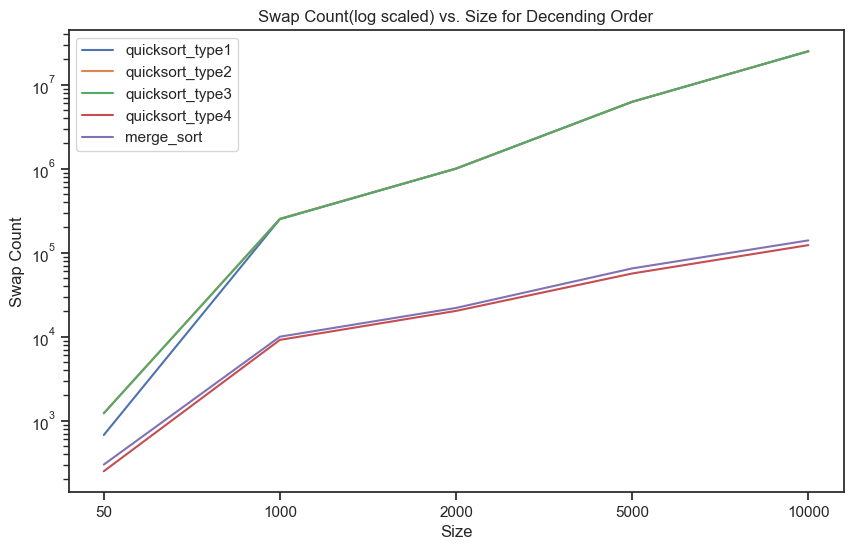

In [24]:
# plot Swap Count vs. Size for Decending Order
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x='size', y='swap_count', hue='sorting_type', data=descending_all, ax=ax)

# add a legend
ax.legend(loc='upper left')

# add a title
ax.set_title('Swap Count(log scaled) vs. Size for Decending Order')

# add x and y labels
ax.set_xlabel('Size')
ax.set_ylabel('Swap Count')

# scale the y axis to a logarithmic scale
ax.set_yscale('log')

plt.show()


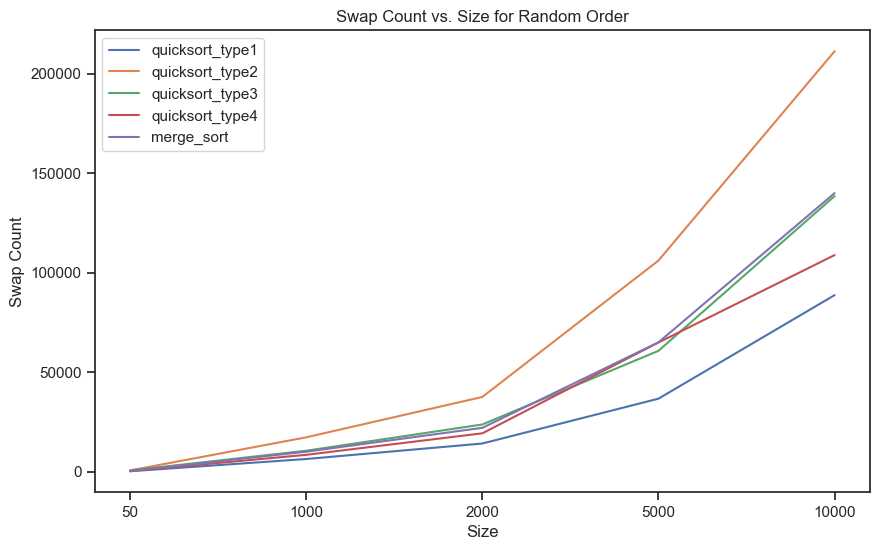

In [115]:
# plot Swap Count vs. Size for Random Order
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x='size', y='swap_count', hue='sorting_type', data=random_all, ax=ax)

# add a legend
ax.legend(loc='upper left')

# add a title
ax.set_title('Swap Count vs. Size for Random Order')

# add x and y labels
ax.set_xlabel('Size')
ax.set_ylabel('Swap Count')

plt.show()